In [21]:
import numpy as np
import pandas as pd
import itertools
import collections
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#read data
data = pd.read_csv("./Data/news.csv")
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
#Get shape
data.shape

(6335, 4)

In [4]:
#Display the number of real and fake news
data['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [5]:
#Get the features
X = data['text']
#Get the labels
y = data['label']

In [6]:
#Split the dataset into training and test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=49)

In [7]:
#Initialize a TfidfVectorizer
tfid_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [8]:
#Fit and transform train set, transform test set
tfid_train = tfid_vectorizer.fit_transform(X_train)
tfid_test = tfid_vectorizer.transform(X_test)

In [9]:
#Initialize a PassiveAggressiveClassifier
PAC = PassiveAggressiveClassifier(max_iter=70)

In [10]:
#Learning the algorithm on training data
PAC.fit(tfid_train,y_train)

PassiveAggressiveClassifier(max_iter=70)

In [11]:
#Predict on the test set
y_pred = PAC.predict(tfid_test)

In [12]:
#Calculate accuracy
score = accuracy_score(y_test,y_pred)
print(f'The accuracy of detection of false news is {round(score*100,2)}%')

The accuracy of detection of false news is 93.53%


In [24]:
#Create Confusion Matrix
con_matrix = confusion_matrix(y_test,y_pred)

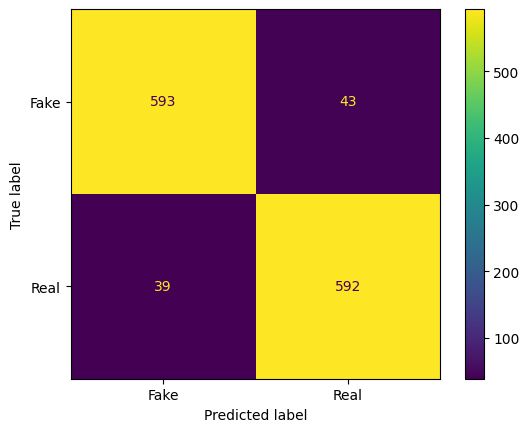

In [25]:
#Display Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=['Fake','Real'])
cm_display.plot()

In [27]:
#Verification of lebels
counter = collections.Counter(y_pred)
counter

Counter({'REAL': 635, 'FAKE': 632})